<a href="https://colab.research.google.com/github/sh-aams/sh-aams/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
diabetes = pd.read_csv('/content/diabetes_csv.csv')
diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [ ]:
diabetes.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [ ]:
diabetes.columns=['# of preg.', 'plasma conc.', 'diasotlic BP', 'Triceps skin fold thickness', 'insuline 2h.', 'body mass ind.', 'pedigree fn.', 'age', 'test_results']
diabetes.columns=pd.MultiIndex.from_tuples(zip(diabetes.columns,['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
                                                                 'Diastolic blood pressure (mm Hg)',
                                                                 'Triceps skin fold thickness (mm)',
                                                                 '2-Hour serum insulin (mu U/ml)',
                                                                 'Body mass index (weight in kg/(height in m)^2)',
                                                                 'Diabetes pedigree function',
                                                                 'Age (years)','class +ve or _ve']))
diabetes.style.set_properties(**{'text-align': 'center'}, inplace=True)
#diabetes

,# of preg.,plasma conc.,diasotlic BP,Triceps skin fold thickness,insuline 2h.,body mass ind.,pedigree fn.,age,test_results
,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),class +ve or _ve
0,6,148,72,35,0,33.600000,0.627000,50,tested_positive
1,1,85,66,29,0,26.600000,0.351000,31,tested_negative
2,8,183,64,0,0,23.300000,0.672000,32,tested_positive
3,1,89,66,23,94,28.100000,0.167000,21,tested_negative
4,0,137,40,35,168,43.100000,2.288000,33,tested_positive
5,5,116,74,0,0,25.600000,0.201000,30,tested_negative
6,3,78,50,32,88,31.000000,0.248000,26,tested_positive
7,10,115,0,0,0,35.300000,0.134000,29,tested_negative
8,2,197,70,45,543,30.500000,0.158000,53,tested_positive


In [ ]:
diabetes.describe()

,# of preg.,plasma conc.,diasotlic BP,Triceps skin fold thickness,insuline 2h.,body mass ind.,pedigree fn.,age
,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
diabetes['# of preg.']

,Number of times pregnant
0,6
1,1
2,8
3,1
4,0
...,...
763,10
764,2
765,5
766,1


In [ ]:
from sklearn import preprocessing
ohe=preprocessing.OneHotEncoder(handle_unknown='ignore')
encoded_diabetes=pd.DataFrame(ohe.fit_transform(diabetes['test_results']).toarray())



In [ ]:
encoded_diabetes=pd.get_dummies(diabetes['test_results'])
diabetes.drop(['test_results'] ,axis=1)
encoded_diabetes= pd.concat([diabetes,encoded_diabetes], axis=1)
encoded_diabetes

<ipython-input-90-d0f4aa8f447d>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  diabetes.drop(['test_results'] ,axis=1)


,"(# of preg., Number of times pregnant)","(plasma conc., Plasma glucose concentration a 2 hours in an oral glucose tolerance test)","(diasotlic BP, Diastolic blood pressure (mm Hg))","(Triceps skin fold thickness, Triceps skin fold thickness (mm))","(insuline 2h., 2-Hour serum insulin (mu U/ml))","(body mass ind., Body mass index (weight in kg/(height in m)^2))","(pedigree fn., Diabetes pedigree function)","(age, Age (years))","(test_results, class +ve or _ve)",class +ve or _ve_tested_negative,class +ve or _ve_tested_positive
0,6,148,72,35,0,33.6,0.627,50,tested_positive,0,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,1,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,0,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,1,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative,1,0
764,2,122,70,27,0,36.8,0.340,27,tested_negative,1,0
765,5,121,72,23,112,26.2,0.245,30,tested_negative,1,0
766,1,126,60,0,0,30.1,0.349,47,tested_positive,0,1


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="rainbow")

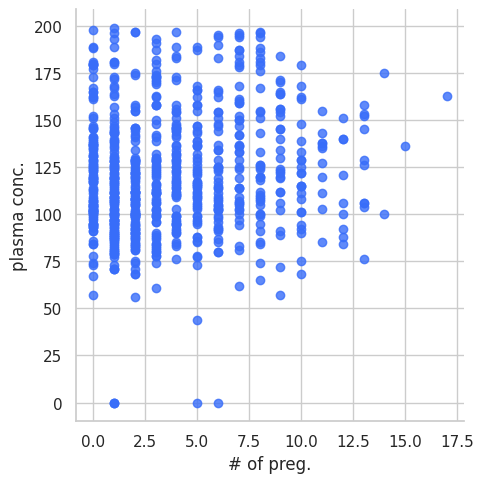

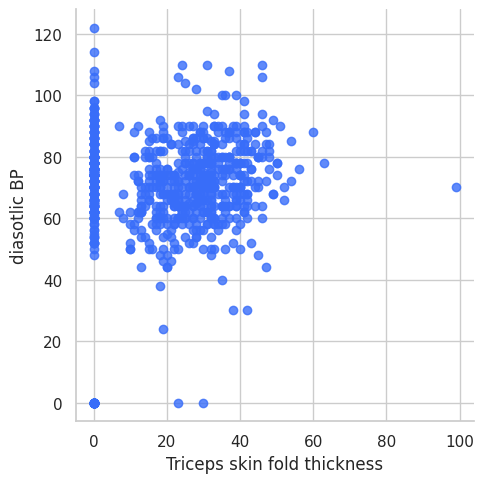

In [ ]:
# encoded_diabetes = sns.load_dataset("diabetes")
# sns.boxplot(x="# of preg.", y="plasma conc.", data=diabetes)
# sns.stripplot(x="# of preg.", y="plasma conc.", data=diabetes)

sns.lmplot(x='# of preg.', y='plasma conc.', data=diabetes, fit_reg=False)
sns.lmplot(x='Triceps skin fold thickness', y='diasotlic BP', data=diabetes, fit_reg=False)

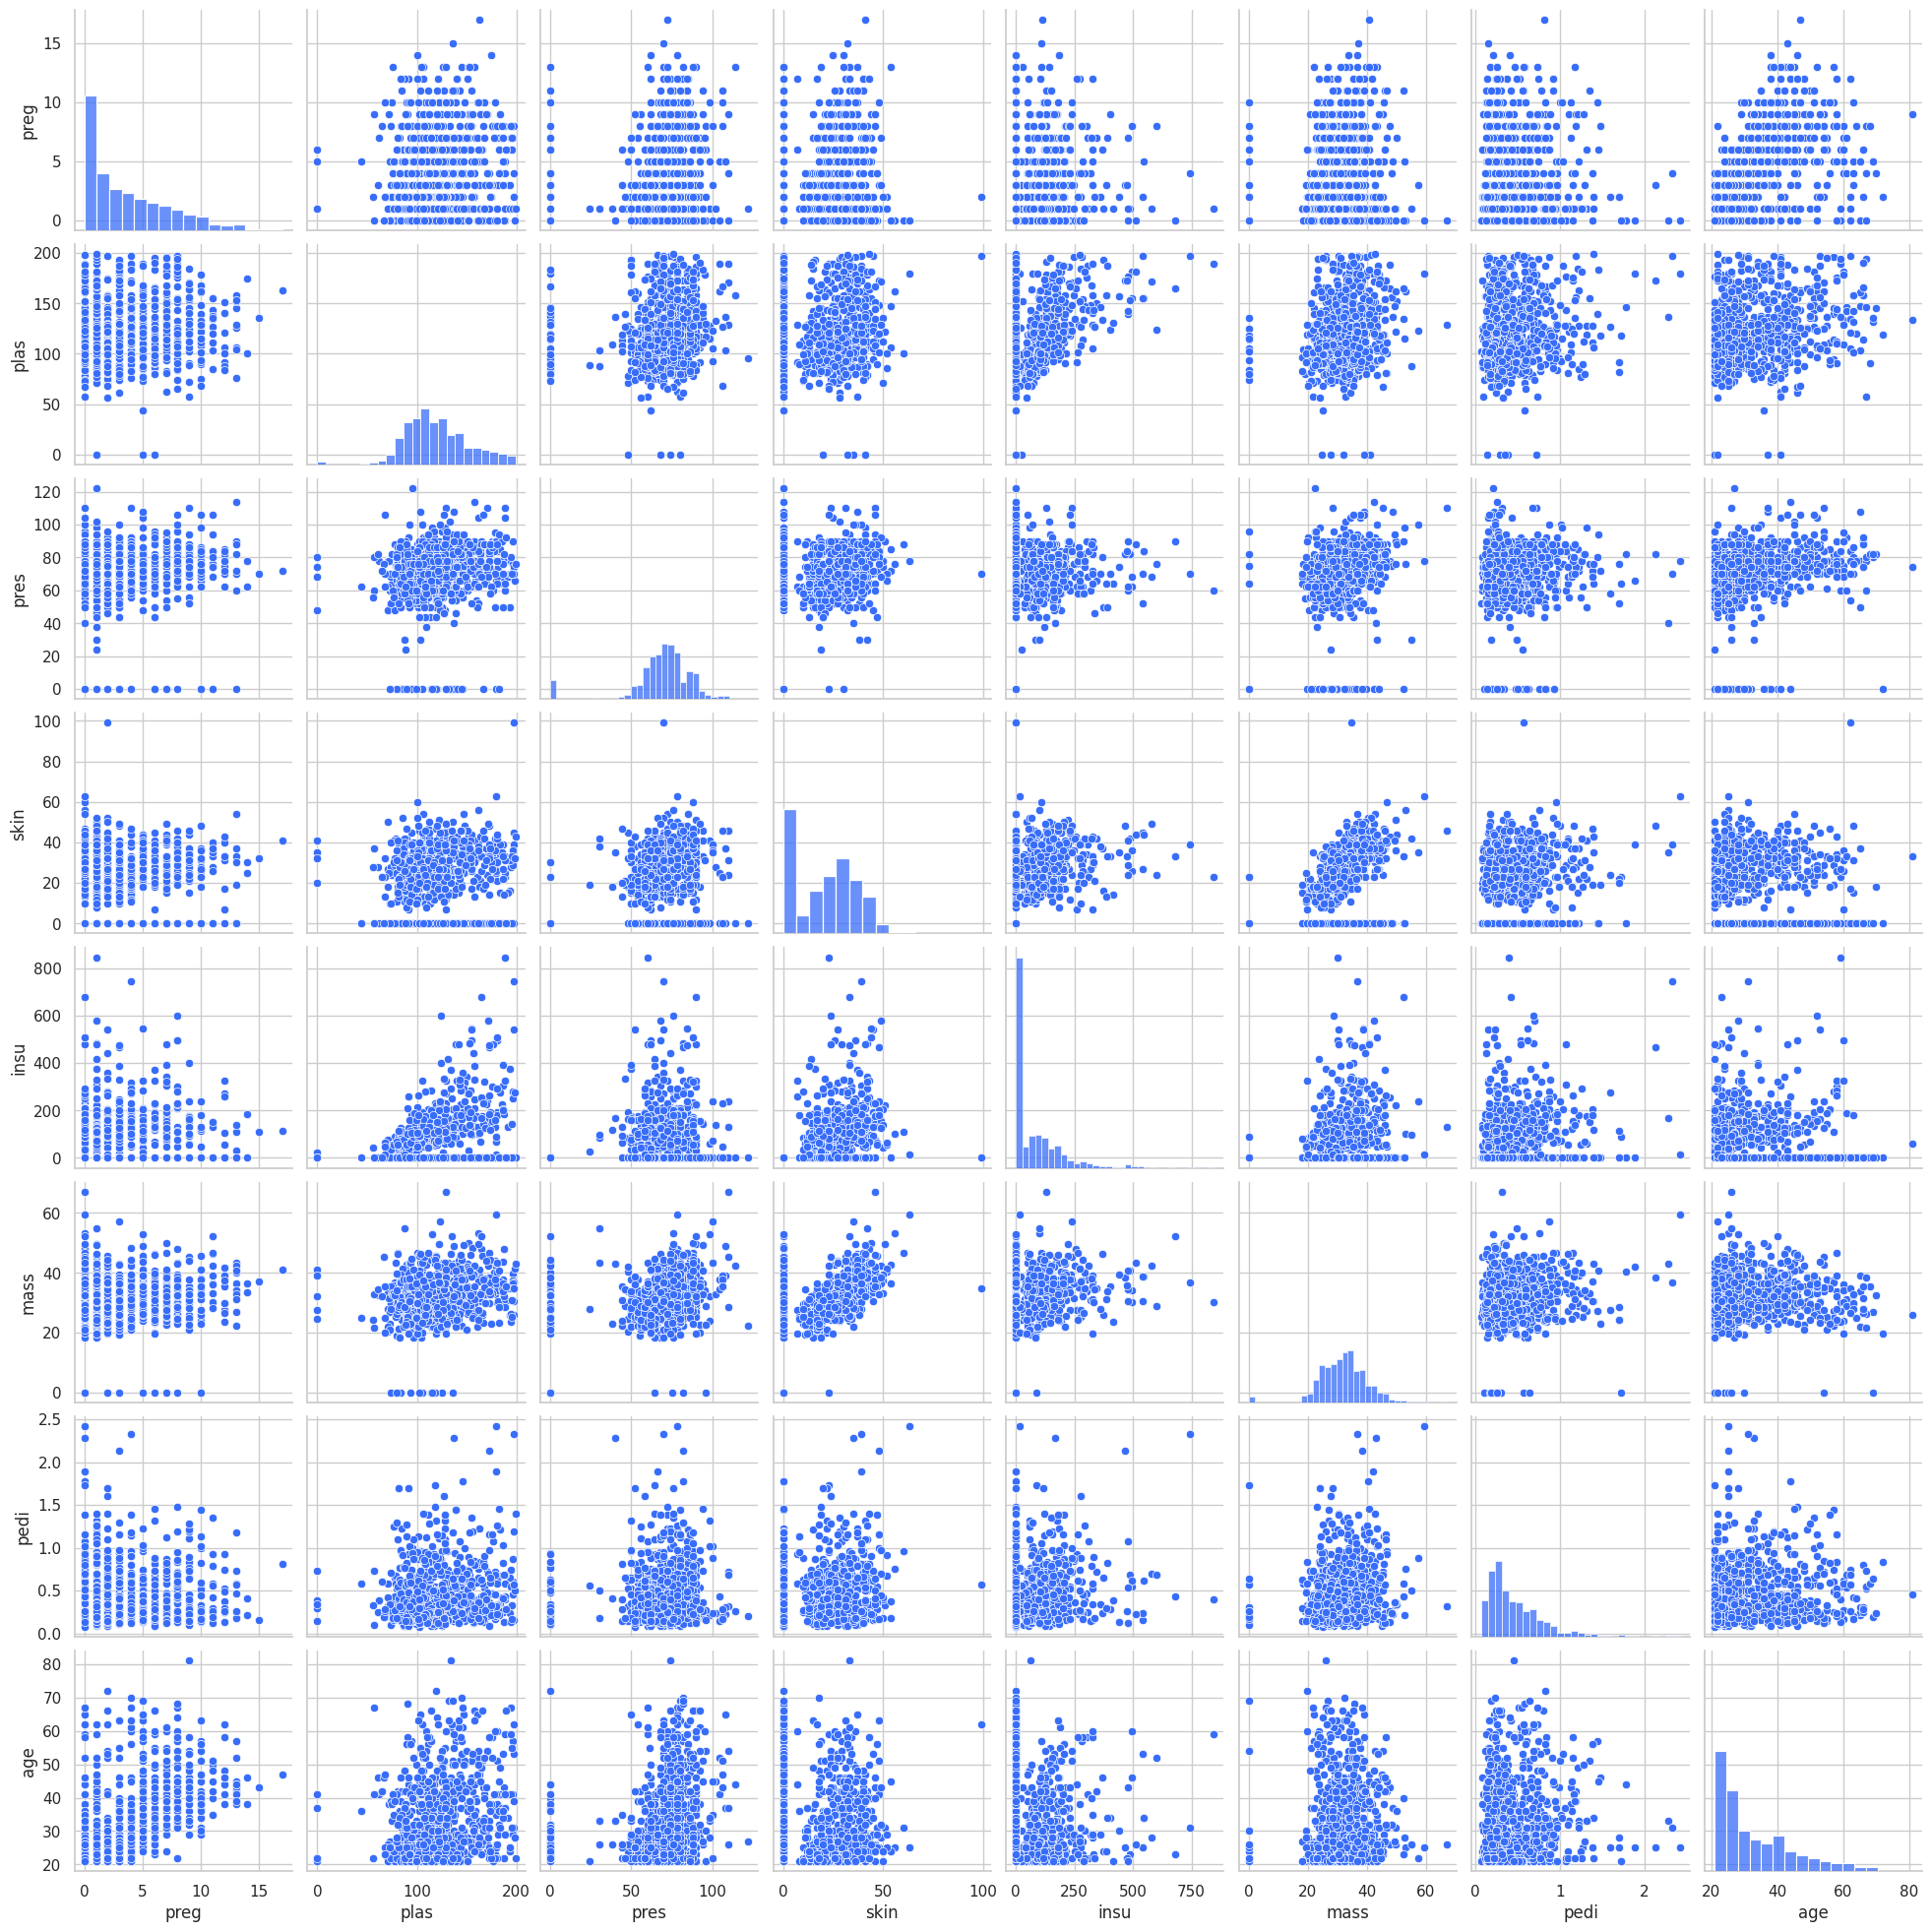

In [ ]:
diabetes.columns = diabetes.columns.str.rstrip()
sns.pairplot(diabetes)